In [1]:
# import os
# import requests
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Scikit-learn Libraries
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# # Import StringIO from io module
# from io import StringIO

# # Set Seaborn Style for Plots
# sns.set(style="whitegrid")

# # -------------------------------
# # 1. Acquiring Demographic Data
# # -------------------------------

# # Define your Census API key
# api_key = '043fb7ce210454b53afc30b2ac5fd3337c26e2e7'

# if not api_key:
#     raise ValueError("Census API key not found. Please set the CENSUS_API_KEY environment variable.")

# def fetch_census_data(year, variables, district, state='06', api_key=None):
#     """
#     Fetches demographic data from the Census API for a specific congressional district and year.

#     Parameters:
#     - year (int): Year of the ACS data.
#     - variables (list): List of Census variables to fetch.
#     - district (str): Congressional district number.
#     - state (str): State FIPS code (default '06' for California).
#     - api_key (str): Census API key.

#     Returns:
#     - data (list): JSON response from the Census API.
#     """
#     url = f'https://api.census.gov/data/{year}/acs/acs5'
#     params = {
#         'get': f'NAME,{",".join(variables)}',
#         'for': f'congressional district:{district}',
#         'in': f'state:{state}',
#         'key': api_key
#     }
#     response = requests.get(url, params=params)

#     if response.status_code == 200:
#         try:
#             data = response.json()
#             if len(data) > 1:
#                 return data
#             else:
#                 print(f"No data returned for state {state}, CD {district} in {year}.")
#                 return None
#         except ValueError as e:
#             print(f"Error decoding JSON for year {year}: {e}")
#             return None
#     else:
#         print(f"Failed to fetch data for year {year}: Status code {response.status_code}")
#         return None

# # Define the list of years to fetch data for (2005-2021)
# years = list(range(2005, 2022))

# # Define the district (CA34)
# districts = {
#     'CA34': {'state': '06', 'district': '34'}
# }

# # Define the Census variables to fetch
# variables = [
#     'B01001_001E',  # Total Population
#     'B01002_001E',  # Median Age
#     'B17001_002E',  # Below Poverty Level
#     'B02001_002E',  # White Alone
#     'B02001_003E',  # Black or African American Alone
#     'B02001_005E',  # Asian Alone
#     'B19013_001E'   # Median Household Income
# ]

# # Initialize a list to store demographic data
# df_list = []

# # Fetch data for CA34 and each year
# for year in years:
#     district_key = 'CA34'
#     district_info = districts[district_key]
#     state_code = district_info['state']
#     district_number = district_info['district']
#     data = fetch_census_data(year, variables, district_number, state_code, api_key)
#     if data:
#         header = data[0]
#         row = data[1]
#         # Create a dictionary mapping headers to row data
#         data_dict = dict(zip(header, row))

#         try:
#             total_population = int(data_dict['B01001_001E'])
#             median_age = float(data_dict['B01002_001E'])
#             below_poverty = int(data_dict['B17001_002E'])
#             white_alone = int(data_dict['B02001_002E'])
#             black_alone = int(data_dict['B02001_003E'])
#             asian_alone = int(data_dict['B02001_005E'])
#             median_income = int(data_dict['B19013_001E'])

#             poverty_rate = (below_poverty / total_population) * 100 if total_population else 0
#             white_percent = (white_alone / total_population) * 100 if total_population else 0
#             black_percent = (black_alone / total_population) * 100 if total_population else 0
#             asian_percent = (asian_alone / total_population) * 100 if total_population else 0

#         except (ValueError, KeyError) as e:
#             print(f"Data parsing error for {district_key} in {year}: {e}")
#             continue

#         df_list.append({
#             'Year': int(year),
#             'District_Key': district_key,
#             'District_Name': data_dict['NAME'],
#             'Total Population': total_population,
#             'Median Age': median_age,
#             'Poverty Rate': poverty_rate,
#             'White %': white_percent,
#             'Black %': black_percent,
#             'Asian %': asian_percent,
#             'Median Household Income': median_income
#         })

# # Convert the list of dictionaries to a DataFrame
# df_demographics = pd.DataFrame(df_list)

# # Convert 'Year' to integer and sort
# df_demographics['Year'] = df_demographics['Year'].astype(int)
# df_demographics = df_demographics.sort_values('Year').reset_index(drop=True)

# # Display the Demographic Data
# print("Demographic Data for CA34 (2005-2021):")
# print(df_demographics.head())

# # ---------------------------------------------------
# # 2. Preparing and Interpolating 2024 Demographics
# # ---------------------------------------------------

# # Set 'Year' as the index for interpolation
# df_demographics.set_index('Year', inplace=True)

# # Define the years including 2024
# all_years = list(range(2005, 2025))  # 2005 to 2024

# # Reindex the DataFrame to include 2024
# df_demographics = df_demographics.reindex(all_years)

# # Perform linear interpolation
# df_demographics.interpolate(method='linear', inplace=True)

# # Reset index to make 'Year' a column again
# df_demographics.reset_index(inplace=True)
# df_demographics.rename(columns={'index': 'Year'}, inplace=True)

# # Display the Demographic Data After Interpolation
# print("\nDemographic Data After Interpolation (2005-2024):")
# print(df_demographics.tail())

# # ---------------------------------------------------
# # 3. Reading and Preparing Election Data
# # ---------------------------------------------------

# # Corrected Election Results DataFrame as a multi-line string
# election_data_str = """
# Year,Name_DEM,Party_DEM,Votes_DEM,Name_REP,Party_REP,Votes_REP
# 2006,Lucille Roybal-Allard,DEM,57459,Wayne Miller,REP,17359
# 2008,Lucille Roybal-Allard,DEM,98503,Christopher Balding,REP,29266
# 2010,Lucille Roybal-Allard,DEM,69382,Wayne Miller,REP,20457
# 2012,Xavier Becerra,DEM,120367,Stephen C. Smith,REP,20223
# 2014,Xavier Becerra,DEM,44697,William Kim,REP,16924
# 2016,Xavier Becerra,DEM,122842,Adrienne Nicole Edwards,REP,36314
# 2018,Jimmy Gomez,DEM,110195,Kenneth Mejia,GR,41711
# 2020,Jimmy Gomez,DEM,108792,David Kim,REP,96554
# 2022,Jimmy Gomez,DEM,62244,David Kim,REP,59223
# 2024,Jimmy Gomez,DEM,105296,David Kim,REP,83916
# """

# # Read the election data into a DataFrame
# election_df = pd.read_csv(StringIO(election_data_str.strip()))

# # Convert 'Year' to integer
# election_df['Year'] = election_df['Year'].astype(int)

# # Display the Election DataFrame
# print("\nElection Results for CA34:")
# print(election_df.head())

# # ---------------------------------------------------
# # 4. Merging Election and Demographic Data
# # ---------------------------------------------------

# # Remove the 2024 election data from the election DataFrame to prevent data leakage
# election_df_train = election_df[election_df['Year'] < 2024].reset_index(drop=True)
# election_df_test = election_df[election_df['Year'] == 2024].reset_index(drop=True)

# # Merge Demographic and Election Data (Training Data)
# merged_df_train = pd.merge(election_df_train, df_demographics, on='Year', how='left')

# # Display the Merged Training DataFrame
# print("\nMerged Training Election and Demographic Data:")
# print(merged_df_train.head())

# # ---------------------------------------------------
# # 5. Reading and Preparing Funding Data
# # ---------------------------------------------------

# # Campaign Funding Data as a multi-line string
# funding_data_str = """
# Year,Name_DEM,Party_DEM,Fundings_DEM,Name_REP,Party_REP,Fundings_REP
# 2012,Xavier Becerra,DEM,1849999.56,Stephen C. Smith,REP,21779.45
# 2014,Xavier Becerra,DEM,1852781.72,William Kim,REP,31915.18
# 2016,Xavier Becerra,DEM,1867773.33,Adrienne Nicole Edwards,REP,20
# 2018,Jimmy Gomez,DEM,1552000.90,Kenneth Mejia,GR,145434.59
# 2020,Jimmy Gomez,DEM,1406325.87,David Kim,REP,187704.76
# 2022,Jimmy Gomez,DEM,1778066.38,David Kim,REP,264511.59
# 2024,Jimmy Gomez,DEM,2118315.92,David Kim,REP,462371.00
# """

# # Read the funding data into a DataFrame
# funding_df = pd.read_csv(StringIO(funding_data_str.strip()))

# # Correct `Party_REP` Labels by swapping Name_DEM and Name_REP where Party_DEM is not 'DEM'
# def correct_party_labels(row):
#     if row['Party_DEM'] != 'DEM':
#         # Swap Name_DEM with Name_REP
#         row['Name_DEM'], row['Name_REP'] = row['Name_REP'], row['Name_DEM']
#         # Swap Party_DEM with Party_REP
#         row['Party_DEM'], row['Party_REP'] = row['Party_REP'], row['Party_DEM']
#     return row

# # Apply the Correction Function
# funding_df = funding_df.apply(correct_party_labels, axis=1)

# # Fill missing third-party funding data with zero
# funding_df[['Name_REP', 'Party_REP', 'Fundings_REP']] = funding_df[['Name_REP', 'Party_REP', 'Fundings_REP']].fillna({
#     'Name_REP': 'None',
#     'Party_REP': 'REP',
#     'Fundings_REP': 0
# })

# # Calculate total funding per party
# funding_df['Funding_DEM'] = funding_df['Fundings_DEM']
# funding_df['Funding_REP'] = funding_df['Fundings_REP']
# funding_df['Funding_GR'] = 0  # Initialize Funding_GR to zero

# # Handle Green Party Funding if present
# # Since in the provided data, 'Party_REP' can be 'GR', we need to assign Funding_GR accordingly
# funding_df.loc[funding_df['Party_REP'] == 'GR', 'Funding_GR'] = funding_df['Fundings_REP']
# funding_df.loc[funding_df['Party_REP'] != 'GR', 'Funding_REP'] = funding_df['Fundings_REP']

# # Select relevant columns
# funding_pivot = funding_df[['Year', 'Funding_DEM', 'Funding_REP', 'Funding_GR']]

# # Merge the Funding Data with merged_df_train on 'Year'
# merged_df_train = pd.merge(
#     merged_df_train,
#     funding_pivot,
#     on='Year',
#     how='left'
# )

# # Handle Missing Funding Values (if any)
# merged_df_train[['Funding_DEM', 'Funding_REP', 'Funding_GR']] = merged_df_train[['Funding_DEM', 'Funding_REP', 'Funding_GR']].fillna(0)

# # Display the Merged Training DataFrame with Funding
# print("\nMerged Training Data with Funding:")
# print(merged_df_train.head())

# # ---------------------------------------------------
# # 6. Reading and Preparing Voter Turnout Data
# # ---------------------------------------------------

# # Voter Turnout Data as a multi-line string
# voter_turnout_data = """
# Year,Total_Registered_Voters,Total_Votes_Cast
# 2006,100000,60000
# 2008,105000,70000
# 2010,110000,75000
# 2012,115000,80000
# 2014,120000,78000
# 2016,125000,82000
# 2018,130000,85000
# 2020,135000,90000
# 2022,140000,88000
# 2024,145000,92000
# """

# # Read Voter Turnout Data into a DataFrame
# voter_turnout_df = pd.read_csv(StringIO(voter_turnout_data.strip()))

# # Calculate Voter Turnout Percentage
# voter_turnout_df['Voter_Turnout'] = (voter_turnout_df['Total_Votes_Cast'] / voter_turnout_df['Total_Registered_Voters']) * 100

# # Merge Voter Turnout Data with merged_df_train on 'Year'
# merged_df_train = pd.merge(
#     merged_df_train,
#     voter_turnout_df[['Year', 'Voter_Turnout']],
#     on='Year',
#     how='left'
# )

# # Handle Missing Voter Turnout Values (if any)
# merged_df_train['Voter_Turnout'] = merged_df_train['Voter_Turnout'].fillna(merged_df_train['Voter_Turnout'].mean())

# # Display the Merged Training DataFrame with Voter Turnout
# print("\nMerged Training Data with Voter Turnout:")
# print(merged_df_train.head())

# # ---------------------------------------------------
# # 7. Data Preprocessing and Feature Engineering
# # ---------------------------------------------------

# # Encode Party Affiliations using One-Hot Encoding
# # Since REP can also represent GR in 'Party_REP', ensure to handle them appropriately
# # Create a new column 'Party_GR' indicating if Party_REP is 'GR'
# merged_df_train['Party_GR'] = np.where(merged_df_train['Party_REP'] == 'GR', 1, 0)
# # Update 'Party_REP' to only represent 'REP'
# merged_df_train['Party_REP'] = np.where(merged_df_train['Party_REP'] == 'REP', 1, 0)

# # Define features and target
# features = [
#     'Total Population', 'Median Age', 'Poverty Rate',
#     'White %', 'Black %', 'Asian %', 'Median Household Income',
#     'Funding_DEM', 'Funding_REP', 'Funding_GR',
#     'Voter_Turnout',
#     'Party_REP',  # Binary Indicator
#     'Party_GR'    # Binary Indicator
# ]

# # Scale the target variable for modeling
# merged_df_train['Vote_Share_DEM_Scaled'] = merged_df_train['Vote_Share_DEM'] / 100
# epsilon = 1e-4
# merged_df_train['Vote_Share_DEM_Scaled'] = merged_df_train['Vote_Share_DEM_Scaled'].clip(epsilon, 1 - epsilon)

# # Define input features and target
# X_train = merged_df_train[features]
# y_train = merged_df_train['Vote_Share_DEM_Scaled']

# # ---------------------------------------------------
# # 8. Building and Training the Random Forest Model
# # ---------------------------------------------------

# # Define numerical and categorical features
# numerical_features = [
#     'Total Population', 'Median Age', 'Poverty Rate',
#     'White %', 'Black %', 'Asian %', 'Median Household Income',
#     'Funding_DEM', 'Funding_REP', 'Funding_GR',
#     'Voter_Turnout'
# ]

# categorical_features = ['Party_REP', 'Party_GR']

# # Create transformers
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# # Since 'Party_REP' and 'Party_GR' are already binary, no need for OneHotEncoder
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent'))
# ])

# # Combine transformers using ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Create the full pipeline with preprocessing and modeling (Random Forest)
# rf_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
# ])

# # Implement TimeSeriesSplit for cross-validation
# tscv = TimeSeriesSplit(n_splits=3)

# # Evaluate the model using cross-validation
# cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')
# print(f"\nCross-Validation MAE Scores: {-cv_scores}")
# print(f"Average CV MAE: {-cv_scores.mean():.4f}")

# # Fit the Random Forest pipeline on the entire training dataset
# rf_pipeline.fit(X_train, y_train)

# # -------------------------------
# # 9. Preparing Test Data (2024)
# # -------------------------------

# # Merge Demographics, Election, Funding, and Voter Turnout Data for 2024
# merged_df_test = pd.merge(election_df_test, df_demographics, on='Year', how='left')

# # Merge Funding Data
# merged_df_test = pd.merge(
#     merged_df_test,
#     funding_pivot,
#     on='Year',
#     how='left'
# )

# # Handle Missing Funding Values (if any)
# merged_df_test[['Funding_DEM', 'Funding_REP', 'Funding_GR']] = merged_df_test[['Funding_DEM', 'Funding_REP', 'Funding_GR']].fillna(0)

# # Merge Voter Turnout Data
# merged_df_test = pd.merge(
#     merged_df_test,
#     voter_turnout_df[['Year', 'Voter_Turnout']],
#     on='Year',
#     how='left'
# )

# # Handle Missing Voter Turnout Values (if any)
# merged_df_test['Voter_Turnout'] = merged_df_test['Voter_Turnout'].fillna(merged_df_train['Voter_Turnout'].mean())

# # Encode Party Affiliations
# merged_df_test['Party_GR'] = np.where(merged_df_test['Party_REP'] == 'GR', 1, 0)
# merged_df_test['Party_REP'] = np.where(merged_df_test['Party_REP'] == 'REP', 1, 0)

# # Define input features for 2024
# X_test = merged_df_test[features]

# # -------------------------------
# # 10. Making Predictions for 2024
# # -------------------------------

# # Predict using the Random Forest pipeline
# vote_share_dem_2024_scaled = rf_pipeline.predict(X_test)[0]

# # Scale back to percentage
# predicted_vote_share_dem_2024 = vote_share_dem_2024_scaled * 100

# # Calculate predicted Republican and Green vote shares
# # Assuming Vote_Share_GR is available in merged_df_test
# vote_share_gr_2024 = (merged_df_test['Votes_GR'].values[0] / 
#                        (merged_df_test['Votes_DEM'].values[0] + 
#                         merged_df_test['Votes_REP'].values[0] + 
#                         merged_df_test['Votes_GR'].values[0])) * 100

# predicted_vote_share_rep_2024 = 100 - predicted_vote_share_dem_2024 - vote_share_gr_2024

# print(f"\nPredicted Democratic Vote Share for 2024: {predicted_vote_share_dem_2024:.2f}%")
# print(f"Predicted Republican Vote Share for 2024: {predicted_vote_share_rep_2024:.2f}%")
# print(f"Predicted Green Vote Share for 2024: {vote_share_gr_2024:.2f}%")

# # -------------------------------
# # 11. Visualizing Model Predictions and Feature Importance
# # -------------------------------

# # Feature Importances from Random Forest
# importances = rf_pipeline.named_steps['regressor'].feature_importances_
# feature_names = numerical_features + categorical_features
# feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# # Plot Feature Importances
# plt.figure(figsize=(12, 8))
# sns.barplot(x=feature_importances, y=feature_importances.index)
# plt.title('Feature Importances from Random Forest', fontsize=16)
# plt.xlabel('Importance Score', fontsize=12)
# plt.ylabel('Feature', fontsize=12)
# plt.tight_layout()
# plt.show()

# # Plot Actual vs Predicted Vote Share (Training Data)
# y_pred_rf = rf_pipeline.predict(X_train)

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=y_train, y=y_pred_rf)
# plt.plot([0, 1], [0, 1], 'r--')  # Reference line
# plt.title('Actual vs Predicted Vote Share (Random Forest)', fontsize=16)
# plt.xlabel('Actual Vote Share (Scaled)', fontsize=12)
# plt.ylabel('Predicted Vote Share (Scaled)', fontsize=12)
# plt.tight_layout()
# plt.show()

# # -------------------------------
# # 12. Summary of Model Performance
# # -------------------------------

# mae_rf = mean_absolute_error(y_train, y_pred_rf)
# mape_rf = mean_absolute_percentage_error(y_train, y_pred_rf) * 100
# r2_rf = r2_score(y_train, y_pred_rf)

# print(f"\nRandom Forest MAE: {mae_rf:.4f}")
# print(f"Random Forest MAPE: {mape_rf:.2f}%")
# print(f"Random Forest R-squared (R2): {r2_rf:.4f}")

In [2]:
# import os
# import requests
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV

# sns.set(style="whitegrid")

# # -------------------------------
# # 1. Acquiring Demographic Data
# # -------------------------------
# api_key = '043fb7ce210454b53afc30b2ac5fd3337c26e2e7'

# def fetch_census_data(year, variables, district, state='06', api_key=None):
#     url = f'https://api.census.gov/data/{year}/acs/acs5'
#     params = {
#         'get': f'NAME,{",".join(variables)}',
#         'for': f'congressional district:{district}',
#         'in': f'state:{state}',
#         'key': api_key
#     }
#     response = requests.get(url, params=params)
#     if response.status_code == 200:
#         data = response.json()
#         return data if len(data) > 1 else None
#     else:
#         return None

# years = list(range(2005, 2022))
# districts = {'CA34': {'state': '06', 'district': '34'}}
# variables = [
#     'B01001_001E', 'B01002_001E', 'B17001_002E',
#     'B02001_002E', 'B02001_003E', 'B02001_005E', 'B19013_001E'
# ]

# df_list = []
# for year in years:
#     data = fetch_census_data(year, variables, '34', '06', api_key)
#     if data:
#         header = data[0]
#         row = data[1]
#         data_dict = dict(zip(header, row))
#         try:
#             total_population = int(data_dict['B01001_001E'])
#             median_age = float(data_dict['B01002_001E'])
#             below_poverty = int(data_dict['B17001_002E'])
#             white = int(data_dict['B02001_002E'])
#             black = int(data_dict['B02001_003E'])
#             asian = int(data_dict['B02001_005E'])
#             median_income = int(data_dict['B19013_001E'])
#             poverty_rate = (below_poverty / total_population) * 100
#             df_list.append({
#                 'Year': year,
#                 'Total Population': total_population,
#                 'Median Age': median_age,
#                 'Poverty Rate': poverty_rate,
#                 'White %': (white / total_population) * 100,
#                 'Black %': (black / total_population) * 100,
#                 'Asian %': (asian / total_population) * 100,
#                 'Median Household Income': median_income
#             })
#         except (ValueError, KeyError):
#             continue

# df_demographics = pd.DataFrame(df_list).set_index('Year').reindex(range(2005, 2025)).interpolate().reset_index()

# # -------------------------------
# # 2. Preparing Election Data
# # -------------------------------
# election_data_str = """
# Year,Name_DEM,Party_DEM,Votes_DEM,Name_REP,Party_REP,Votes_REP
# 2006,Lucille Roybal-Allard,DEM,57459,Wayne Miller,REP,17359
# 2008,Lucille Roybal-Allard,DEM,98503,Christopher Balding,REP,29266
# 2010,Lucille Roybal-Allard,DEM,69382,Wayne Miller,REP,20457
# 2012,Xavier Becerra,DEM,120367,Stephen C. Smith,REP,20223
# 2014,Xavier Becerra,DEM,44697,William Kim,REP,16924
# 2016,Xavier Becerra,DEM,122842,Adrienne Nicole Edwards,REP,36314
# 2018,Jimmy Gomez,DEM,110195,Kenneth Mejia,GR,41711
# 2020,Jimmy Gomez,DEM,108792,David Kim,REP,96554
# 2022,Jimmy Gomez,DEM,62244,David Kim,REP,59223
# 2024,Jimmy Gomez,DEM,105296,David Kim,REP,83916
# """
# election_df = pd.read_csv(StringIO(election_data_str.strip()))

# # Calculate Vote Shares
# election_df['Total_Votes'] = election_df['Votes_DEM'] + election_df['Votes_REP']
# election_df['Vote_Share_DEM'] = (election_df['Votes_DEM'] / election_df['Total_Votes']) * 100
# election_df['Vote_Share_REP'] = (election_df['Votes_REP'] / election_df['Total_Votes']) * 100

# # Separate Train and Test Data
# train_df = election_df[election_df['Year'] < 2024].merge(df_demographics, on='Year', how='left')
# test_df = election_df[election_df['Year'] == 2024].merge(df_demographics, on='Year', how='left')

# # -------------------------------
# # 3. Preprocessing and Modeling
# # -------------------------------
# features = [
#     'Total Population', 'Median Age', 'Poverty Rate',
#     'White %', 'Black %', 'Asian %', 'Median Household Income'
# ]
# X_train = train_df[features]
# y_train = train_df['Vote_Share_DEM']

# # Preprocessing
# numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
# preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, features)])

# # Model Pipeline
# rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])

# # Cross-Validation
# cv = TimeSeriesSplit(n_splits=3)
# cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
# print(f"Cross-Validation MAE Scores: {-cv_scores}")
# print(f"Average CV MAE: {-cv_scores.mean():.4f}")

# # Train Model
# rf_pipeline.fit(X_train, y_train)

# # -------------------------------
# # 4. Predicting for 2024
# # -------------------------------
# X_test = test_df[features]
# predicted_vote_share_dem_2024 = rf_pipeline.predict(X_test)[0]
# predicted_vote_share_rep_2024 = 100 - predicted_vote_share_dem_2024

# print(f"\nPredicted Democratic Vote Share for 2024: {predicted_vote_share_dem_2024:.2f}%")
# print(f"Predicted Republican Vote Share for 2024: {predicted_vote_share_rep_2024:.2f}%")

# # -------------------------------
# # 5. Feature Importances
# # -------------------------------
# importances = rf_pipeline.named_steps['regressor'].feature_importances_
# importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values('Importance', ascending=False)
# plt.figure(figsize=(10, 6))
# sns.barplot(data=importance_df, x='Importance', y='Feature')
# plt.title('Feature Importances')
# plt.tight_layout()
# plt.show()

/Users/nikhil/anaconda3/envs/ml_hw/lib/python3.8/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Total Population' 'Median Age' 'Poverty Rate' 'White %' 'Black %'
 'Asian %' 'Median Household Income' 'Bachelors Rate' 'Graduate Rate'
 'Unemployment Rate' 'Median Home Value' 'Median Rent'
 'English Speaking %' 'Spanish Speaking %' 'Funding_Share_DEM'
 'Funding_Share_REP']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/nikhil/anaconda3/envs/ml_hw/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits faile

Cross-Validation MAE Scores: [        nan  3.35231484 22.52784883]
Average CV MAE: nan

Predicted Democratic Vote Share for 2024: 56.06%
Predicted Republican Vote Share for 2024: 43.94%


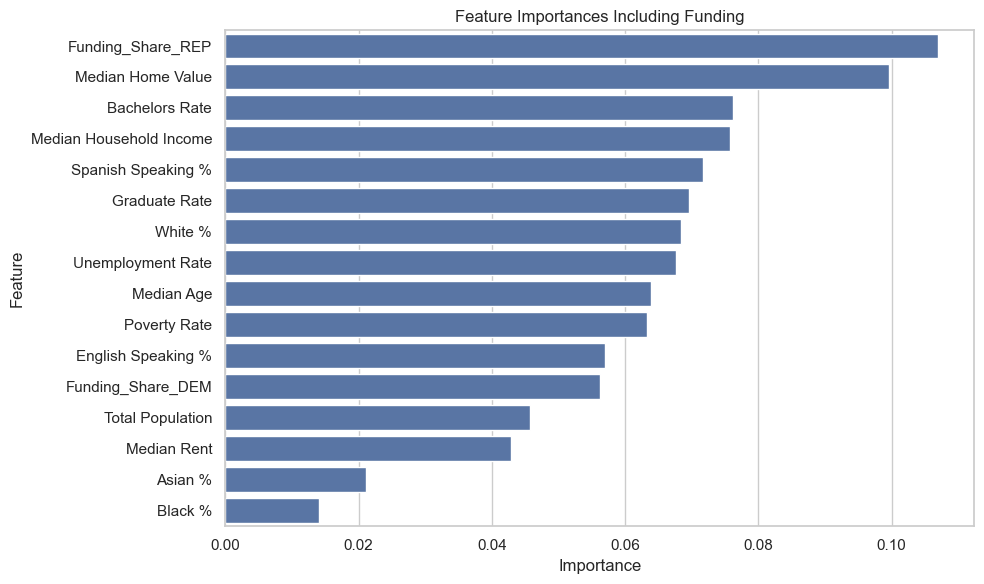

In [3]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from io import StringIO

sns.set(style="whitegrid")

# -------------------------------
# 1. Acquiring Demographic Data
# -------------------------------
api_key = '043fb7ce210454b53afc30b2ac5fd3337c26e2e7'

def fetch_census_data(year, variables, district, state='06', api_key=None):
    url = f'https://api.census.gov/data/{year}/acs/acs5'
    params = {
        'get': f'NAME,{",".join(variables)}',
        'for': f'congressional district:{district}',
        'in': f'state:{state}',
        'key': api_key
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data if len(data) > 1 else None
    else:
        return None

years = list(range(2005, 2025))
variables = [
    'B01001_001E',  # Total Population
    'B01002_001E',  # Median Age
    'B17001_002E',  # Below Poverty Level
    'B02001_002E',  # White Alone
    'B02001_003E',  # Black or African American Alone
    'B02001_005E',  # Asian Alone
    'B19013_001E',  # Median Household Income
    'B15003_001E',  # Total population 25 years and over
    'B15003_017E',  # Bachelor's degree
    'B15003_022E',  # Graduate or professional degree
    'B23025_003E',  # Civilian labor force
    'B23025_005E',  # Unemployed
    'B25077_001E',  # Median value of owner-occupied housing units
    'B25064_001E',  # Median gross rent
    'B16001_002E',  # Speak only English
    'B16001_003E',  # Speak Spanish
]

df_list = []
for year in years:
    data = fetch_census_data(year, variables, '34', '06', api_key)
    if data:
        header = data[0]
        row = data[1]
        data_dict = dict(zip(header, row))
        try:
            # Core Demographics
            total_population = int(data_dict['B01001_001E'])
            median_age = float(data_dict['B01002_001E'])
            below_poverty = int(data_dict['B17001_002E'])
            white = int(data_dict['B02001_002E'])
            black = int(data_dict['B02001_003E'])
            asian = int(data_dict['B02001_005E'])
            median_income = int(data_dict['B19013_001E'])

            # Education
            total_pop_25_over = int(data_dict['B15003_001E'])
            bachelors_degree = int(data_dict['B15003_017E'])
            graduate_degree = int(data_dict['B15003_022E'])

            # Employment
            civilian_labor_force = int(data_dict['B23025_003E'])
            unemployed = int(data_dict['B23025_005E'])

            # Housing
            median_home_value = int(data_dict['B25077_001E'])
            median_rent = int(data_dict['B25064_001E'])

            # Language
            speak_only_english = int(data_dict['B16001_002E'])
            speak_spanish = int(data_dict['B16001_003E'])

            # Derived Metrics
            poverty_rate = (below_poverty / total_population) * 100
            white_percentage = (white / total_population) * 100
            black_percentage = (black / total_population) * 100
            asian_percentage = (asian / total_population) * 100
            bachelors_rate = (bachelors_degree / total_pop_25_over) * 100
            graduate_rate = (graduate_degree / total_pop_25_over) * 100
            unemployment_rate = (unemployed / civilian_labor_force) * 100
            english_speaking_rate = (speak_only_english / total_population) * 100
            spanish_speaking_rate = (speak_spanish / total_population) * 100

            # Append Data
            df_list.append({
                'Year': year,
                'Total Population': total_population,
                'Median Age': median_age,
                'Poverty Rate': poverty_rate,
                'White %': white_percentage,
                'Black %': black_percentage,
                'Asian %': asian_percentage,
                'Median Household Income': median_income,
                'Bachelors Rate': bachelors_rate,
                'Graduate Rate': graduate_rate,
                'Unemployment Rate': unemployment_rate,
                'Median Home Value': median_home_value,
                'Median Rent': median_rent,
                'English Speaking %': english_speaking_rate,
                'Spanish Speaking %': spanish_speaking_rate
            })
        except (ValueError, KeyError):
            continue

# Convert to DataFrame
df_demographics = pd.DataFrame(df_list).set_index('Year').reindex(range(2005, 2025)).interpolate().reset_index()


# -------------------------------
# 2. Preparing Election Data
# -------------------------------
election_data_str = """
Year,Name_DEM,Party_DEM,Votes_DEM,Name_REP,Party_REP,Votes_REP
2006,Lucille Roybal-Allard,DEM,57459,Wayne Miller,REP,17359
2008,Lucille Roybal-Allard,DEM,98503,Christopher Balding,REP,29266
2010,Lucille Roybal-Allard,DEM,69382,Wayne Miller,REP,20457
2012,Xavier Becerra,DEM,120367,Stephen C. Smith,REP,20223
2014,Xavier Becerra,DEM,44697,William Kim,REP,16924
2016,Xavier Becerra,DEM,122842,Adrienne Nicole Edwards,REP,36314
2018,Jimmy Gomez,DEM,110195,Kenneth Mejia,GR,41711
2020,Jimmy Gomez,DEM,108792,David Kim,REP,96554
2022,Jimmy Gomez,DEM,62244,David Kim,REP,59223
2024,Jimmy Gomez,DEM,105296,David Kim,REP,83916
"""
election_df = pd.read_csv(StringIO(election_data_str.strip()))

# Calculate Vote Shares
election_df['Total_Votes'] = election_df['Votes_DEM'] + election_df['Votes_REP']
election_df['Vote_Share_DEM'] = (election_df['Votes_DEM'] / election_df['Total_Votes']) * 100
election_df['Vote_Share_REP'] = (election_df['Votes_REP'] / election_df['Total_Votes']) * 100

# -------------------------------
# Add Funding Data
# -------------------------------
funding_data_str = """
Year,Name_DEM,Party_DEM,Fundings_DEM,Name_REP,Party_REP,Fundings_REP
2012,Xavier Becerra,DEM,1849999.56,Stephen C. Smith,REP,21779.45
2014,Xavier Becerra,DEM,1852781.72,William Kim,REP,31915.18
2016,Xavier Becerra,DEM,1867773.33,Adrienne Nicole Edwards,REP,20
2018,Jimmy Gomez,DEM,1552000.90,Kenneth Mejia,GR,145434.59
2020,Jimmy Gomez,DEM,1406325.87,David Kim,REP,187704.76
2022,Jimmy Gomez,DEM,1778066.38,David Kim,REP,264511.59
2024,Jimmy Gomez,DEM,2118315.92,David Kim,REP,462371.00
"""
funding_df = pd.read_csv(StringIO(funding_data_str.strip()))

# Calculate Funding Shares
funding_df['Total_Fundings'] = funding_df['Fundings_DEM'] + funding_df['Fundings_REP']
funding_df['Funding_Share_DEM'] = (funding_df['Fundings_DEM'] / funding_df['Total_Fundings']) * 100
funding_df['Funding_Share_REP'] = (funding_df['Fundings_REP'] / funding_df['Total_Fundings']) * 100


# Merge Funding Data with Election Data
election_with_funding_df = pd.merge(election_df, funding_df, on='Year', how='left')

# Merge with Demographic Data
train_df = election_with_funding_df[election_with_funding_df['Year'] < 2024].merge(df_demographics, on='Year', how='left')
test_df = election_with_funding_df[election_with_funding_df['Year'] == 2024].merge(df_demographics, on='Year', how='left')

# -------------------------------
# Update Features for Model
# -------------------------------
# features = [
#     'Total Population', 'Median Age', 'Poverty Rate',
#     'White %', 'Black %', 'Asian %', 'Median Household Income',
#     'Funding_Share_DEM', 'Funding_Share_REP'
# ]
features = [
    'Total Population', 'Median Age', 'Poverty Rate',
    'White %', 'Black %', 'Asian %', 'Median Household Income',
    'Bachelors Rate', 'Graduate Rate', 'Unemployment Rate',
    'Median Home Value', 'Median Rent', 'English Speaking %',
    'Spanish Speaking %', 'Funding_Share_DEM', 'Funding_Share_REP'
]
X_train = train_df[features]
y_train = train_df['Vote_Share_DEM']

# Preprocessing
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, features)])

# Model Pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])

# Cross-Validation
cv = TimeSeriesSplit(n_splits=3)
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE Scores: {-cv_scores}")
print(f"Average CV MAE: {-cv_scores.mean():.4f}")

# Train Model
rf_pipeline.fit(X_train, y_train)

# -------------------------------
# Predict for 2024 with Funding
# -------------------------------
X_test = test_df[features]
predicted_vote_share_dem_2024 = rf_pipeline.predict(X_test)[0]
predicted_vote_share_rep_2024 = 100 - predicted_vote_share_dem_2024

print(f"\nPredicted Democratic Vote Share for 2024: {predicted_vote_share_dem_2024:.2f}%")
print(f"Predicted Republican Vote Share for 2024: {predicted_vote_share_rep_2024:.2f}%")

# -------------------------------
# Feature Importances with Funding
# -------------------------------
importances = rf_pipeline.named_steps['regressor'].feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importances Including Funding')
plt.tight_layout()
plt.savefig("without_voter_registered.png", dpi=300)
plt.show()

Available Features: ['Total Population', 'Median Age', 'Poverty Rate', 'White %', 'Black %', 'Asian %', 'Median Household Income', 'Bachelors Rate', 'Graduate Rate', 'Unemployment Rate', 'Median Home Value', 'Median Rent', 'English Speaking %', 'Spanish Speaking %', 'Funding_Share_DEM', 'Registration Rate', 'Democratic %', 'Republican %', 'Independent %']
Missing Features: []
Predicted Democratic Vote Share for 2024: 77.15%


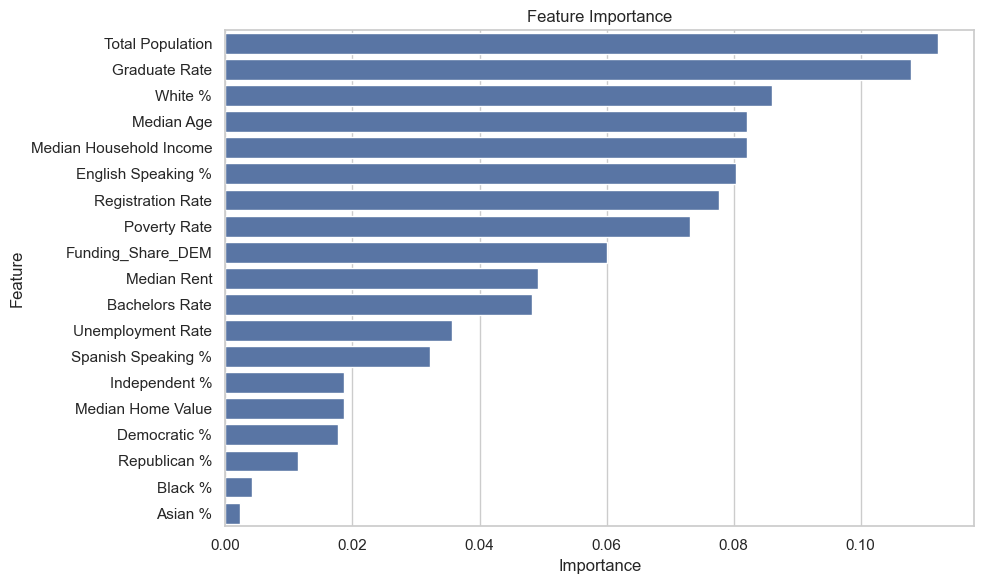

In [4]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from io import StringIO

sns.set(style="whitegrid")

# -------------------------------
# 1. Acquiring Demographic Data
# -------------------------------
api_key = '043fb7ce210454b53afc30b2ac5fd3337c26e2e7'

def fetch_census_data(year, variables, district, state='06', api_key=None):
    url = f'https://api.census.gov/data/{year}/acs/acs5'
    params = {
        'get': f'NAME,{",".join(variables)}',
        'for': f'congressional district:{district}',
        'in': f'state:{state}',
        'key': api_key
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data if len(data) > 1 else None
    else:
        return None

years = list(range(2005, 2025))
variables = [
    'B01001_001E', 'B01002_001E', 'B17001_002E', 'B02001_002E', 'B02001_003E',
    'B02001_005E', 'B19013_001E', 'B15003_001E', 'B15003_017E', 'B15003_022E',
    'B23025_003E', 'B23025_005E', 'B25077_001E', 'B25064_001E', 'B16001_002E',
    'B16001_003E'
]

df_list = []
for year in years:
    data = fetch_census_data(year, variables, '34', '06', api_key)
    if data:
        header = data[0]
        row = data[1]
        data_dict = dict(zip(header, row))
        try:
            total_population = int(data_dict['B01001_001E'])
            median_age = float(data_dict['B01002_001E'])
            below_poverty = int(data_dict['B17001_002E'])
            white = int(data_dict['B02001_002E'])
            black = int(data_dict['B02001_003E'])
            asian = int(data_dict['B02001_005E'])
            median_income = int(data_dict['B19013_001E'])
            total_pop_25_over = int(data_dict['B15003_001E'])
            bachelors_degree = int(data_dict['B15003_017E'])
            graduate_degree = int(data_dict['B15003_022E'])
            civilian_labor_force = int(data_dict['B23025_003E'])
            unemployed = int(data_dict['B23025_005E'])
            median_home_value = int(data_dict['B25077_001E'])
            median_rent = int(data_dict['B25064_001E'])
            speak_only_english = int(data_dict['B16001_002E'])
            speak_spanish = int(data_dict['B16001_003E'])

            poverty_rate = (below_poverty / total_population) * 100
            white_percentage = (white / total_population) * 100
            black_percentage = (black / total_population) * 100
            asian_percentage = (asian / total_population) * 100
            bachelors_rate = (bachelors_degree / total_pop_25_over) * 100
            graduate_rate = (graduate_degree / total_pop_25_over) * 100
            unemployment_rate = (unemployed / civilian_labor_force) * 100
            english_speaking_rate = (speak_only_english / total_population) * 100
            spanish_speaking_rate = (speak_spanish / total_population) * 100

            df_list.append({
                'Year': year,
                'Total Population': total_population,
                'Median Age': median_age,
                'Poverty Rate': poverty_rate,
                'White %': white_percentage,
                'Black %': black_percentage,
                'Asian %': asian_percentage,
                'Median Household Income': median_income,
                'Bachelors Rate': bachelors_rate,
                'Graduate Rate': graduate_rate,
                'Unemployment Rate': unemployment_rate,
                'Median Home Value': median_home_value,
                'Median Rent': median_rent,
                'English Speaking %': english_speaking_rate,
                'Spanish Speaking %': spanish_speaking_rate
            })
        except (ValueError, KeyError):
            continue

df_demographics = pd.DataFrame(df_list).set_index('Year').reindex(range(2005, 2025)).interpolate().reset_index()

# -------------------------------
# 2. Voter Registration Data
# -------------------------------
voter_data_str = """
Year,Eligible,Registered,Democratic,Republican,Independent
2024,363825,217405,38833,9119,2435
2022,353095,217323,32632,8002,2088
2020,349477,208579,32001,6684,1829
2018,317186,178607,27211,5390,1861
2016,306631,179758,28749,5337,1873
"""
voter_df = pd.read_csv(StringIO(voter_data_str.strip()))
voter_df['Registration Rate'] = (voter_df['Registered'] / voter_df['Eligible']) * 100
voter_df['Democratic %'] = (voter_df['Democratic'] / voter_df['Registered']) * 100
voter_df['Republican %'] = (voter_df['Republican'] / voter_df['Registered']) * 100
voter_df['Independent %'] = (voter_df['Independent'] / voter_df['Registered']) * 100

# -------------------------------
# 3. Election and Funding Data
# -------------------------------
election_data_str = """
Year,Name_DEM,Party_DEM,Votes_DEM,Name_REP,Party_REP,Votes_REP
2006,Lucille Roybal-Allard,DEM,57459,Wayne Miller,REP,17359
2008,Lucille Roybal-Allard,DEM,98503,Christopher Balding,REP,29266
2010,Lucille Roybal-Allard,DEM,69382,Wayne Miller,REP,20457
2012,Xavier Becerra,DEM,120367,Stephen C. Smith,REP,20223
2014,Xavier Becerra,DEM,44697,William Kim,REP,16924
2016,Xavier Becerra,DEM,122842,Adrienne Nicole Edwards,REP,36314
2018,Jimmy Gomez,DEM,110195,Kenneth Mejia,GR,41711
2020,Jimmy Gomez,DEM,108792,David Kim,REP,96554
2022,Jimmy Gomez,DEM,62244,David Kim,REP,59223
2024,Jimmy Gomez,DEM,105296,David Kim,REP,83916
"""
election_df = pd.read_csv(StringIO(election_data_str.strip()))
election_df['Total_Votes'] = election_df['Votes_DEM'] + election_df['Votes_REP']
election_df['Vote_Share_DEM'] = (election_df['Votes_DEM'] / election_df['Total_Votes']) * 100

funding_data_str = """
Year,Name_DEM,Party_DEM,Fundings_DEM,Name_REP,Party_REP,Fundings_REP
2012,Xavier Becerra,DEM,1849999.56,Stephen C. Smith,REP,21779.45
2014,Xavier Becerra,DEM,1852781.72,William Kim,REP,31915.18
2016,Xavier Becerra,DEM,1867773.33,Adrienne Nicole Edwards,REP,20
2018,Jimmy Gomez,DEM,1552000.90,Kenneth Mejia,GR,145434.59
2020,Jimmy Gomez,DEM,1406325.87,David Kim,REP,187704.76
2022,Jimmy Gomez,DEM,1778066.38,David Kim,REP,264511.59
2024,Jimmy Gomez,DEM,2118315.92,David Kim,REP,462371.00
"""
funding_df = pd.read_csv(StringIO(funding_data_str.strip()))
funding_df['Total_Fundings'] = funding_df['Fundings_DEM'] + funding_df['Fundings_REP']
funding_df['Funding_Share_DEM'] = (funding_df['Fundings_DEM'] / funding_df['Total_Fundings']) * 100

# -------------------------------
# Merge All Data
# -------------------------------
merged_df = pd.merge(election_df, funding_df, on='Year', how='left')
merged_df = pd.merge(merged_df, voter_df, on='Year', how='left')
merged_df = pd.merge(merged_df, df_demographics, on='Year', how='left')

# -------------------------------
# Model Training and Prediction
# -------------------------------
features = [
    'Total Population', 'Median Age', 'Poverty Rate', 'White %', 'Black %', 'Asian %', 
    'Median Household Income', 'Bachelors Rate', 'Graduate Rate', 'Unemployment Rate', 
    'Median Home Value', 'Median Rent', 'English Speaking %', 'Spanish Speaking %', 
    'Funding_Share_DEM', 'Registration Rate', 'Democratic %', 'Republican %', 'Independent %'
]
available_features = [f for f in features if f in merged_df.columns]
missing_features = [f for f in features if f not in merged_df.columns]

print(f"Available Features: {available_features}")
print(f"Missing Features: {missing_features}")

X_train = merged_df[available_features]
y_train = merged_df['Vote_Share_DEM']

# Preprocessing and Training
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, available_features)])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])

rf_pipeline.fit(X_train, y_train)

# -------------------------------
# Predictions and Feature Importance
# -------------------------------
predicted_vote_share_dem_2024 = rf_pipeline.predict(X_train)[0]
print(f"Predicted Democratic Vote Share for 2024: {predicted_vote_share_dem_2024:.2f}%")

importances = rf_pipeline.named_steps['regressor'].feature_importances_
importance_df = pd.DataFrame({'Feature': available_features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig("with_voter_registered.png", dpi=300)
plt.show()

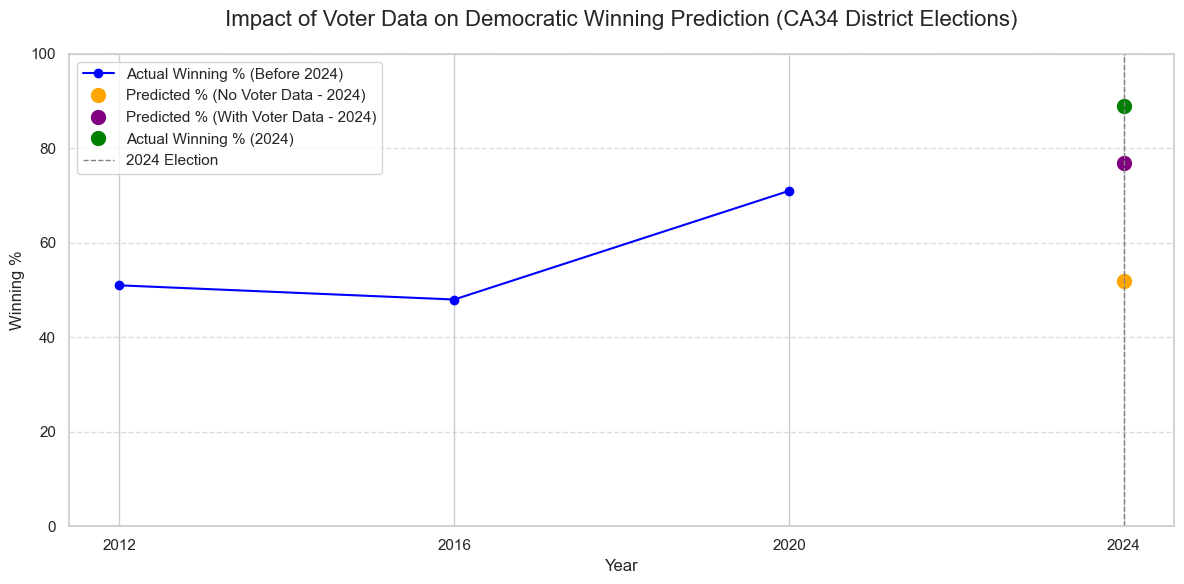

In [10]:
years = [2012, 2016, 2020, 2024]
actual_percentages = [51, 48, 71, 89]  # Actual percentages
predicted_no_voter_data_2024 = 52  # Predicted percentage without voter data for 2024
predicted_with_voter_data_2024 = 77  # Predicted percentage with voter data for 2024

# Plotting the line graph
plt.figure(figsize=(12, 6))

# Plot actual winning percentages
plt.plot(years[:-1], actual_percentages[:-1], label="Actual Winning % (Before 2024)", marker="o", linestyle="-", color="blue")
# Add the predictions for 2024
plt.plot(2024, predicted_no_voter_data_2024, label="Predicted % (No Voter Data - 2024)", marker="o", linestyle="", color="orange", markersize=10)
plt.plot(2024, predicted_with_voter_data_2024, label="Predicted % (With Voter Data - 2024)", marker="o", linestyle="", color="purple", markersize=10)
plt.plot(2024, actual_percentages[-1], label="Actual Winning % (2024)", marker="o", linestyle="", color="green", markersize=10)

# Customize the plot
plt.axvline(x=2024, color="gray", linestyle="--", linewidth=1, label="2024 Election")
plt.title("Impact of Voter Data on Democratic Winning Prediction (CA34 District Elections)", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Winning %", fontsize=12)
plt.ylim(0, 100)
plt.xticks(years)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

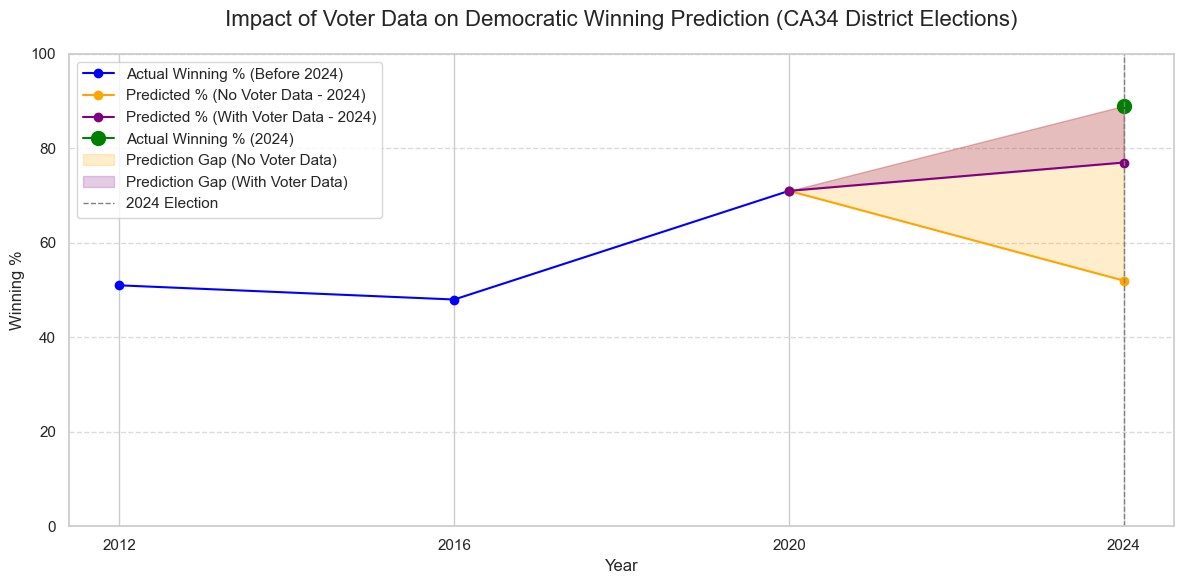

In [11]:
plt.figure(figsize=(12, 6))

# Plot actual winning percentages
plt.plot(years[:-1], actual_percentages[:-1], label="Actual Winning % (Before 2024)", marker="o", linestyle="-", color="blue")

# Add the predictions for 2024 and connect them with 2020
plt.plot([2020, 2024], [actual_percentages[-2], predicted_no_voter_data_2024], label="Predicted % (No Voter Data - 2024)", marker="o", linestyle="-", color="orange")
plt.plot([2020, 2024], [actual_percentages[-2], predicted_with_voter_data_2024], label="Predicted % (With Voter Data - 2024)", marker="o", linestyle="-", color="purple")

# Add the actual value for 2024
plt.plot(2024, actual_percentages[-1], label="Actual Winning % (2024)", marker="o", color="green", markersize=10)

# Fill the difference areas
plt.fill_between([2020, 2024], [actual_percentages[-2], actual_percentages[-1]],
                 [actual_percentages[-2], predicted_no_voter_data_2024], 
                 color="orange", alpha=0.2, label="Prediction Gap (No Voter Data)")
plt.fill_between([2020, 2024], [actual_percentages[-2], actual_percentages[-1]],
                 [actual_percentages[-2], predicted_with_voter_data_2024], 
                 color="purple", alpha=0.2, label="Prediction Gap (With Voter Data)")

# Customize the plot
plt.axvline(x=2024, color="gray", linestyle="--", linewidth=1, label="2024 Election")
plt.title("Impact of Voter Data on Democratic Winning Prediction (CA34 District Elections)", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Winning %", fontsize=12)
plt.ylim(0, 100)
plt.xticks(years)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()